In [1]:
import numpy as np
import pandas_datareader as web
import datetime
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

start_datetime = datetime.datetime(2000, 1, 1)
end_datetime = datetime.datetime(2024, 4, 30)

start_str = "2000-01-01"
end_str = "2024-04-30"

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


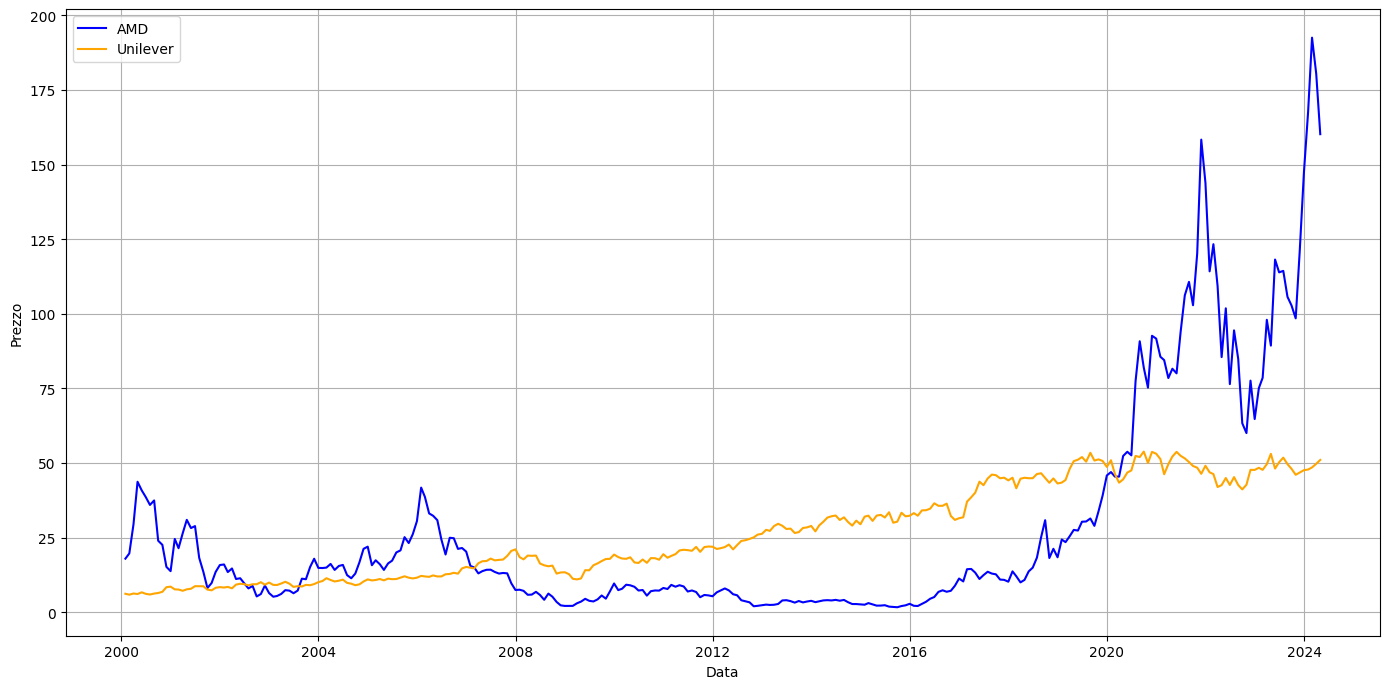

In [2]:
# Scarico i dati dei prezzi delle azioni di AMD e Unilever
amd_data = yf.download("AMD", start = start_str, end = end_str)
unilever_data = yf.download("UL", start = start_str, end = end_str)


# Trasformo i dati giornalieri in dati mensili
amd_monthly_data = amd_data['Adj Close'].resample('M').last()
unilever_monthly_data = unilever_data['Adj Close'].resample('M').last()
   
# Calcolo il rendimento percentuale rispetto al prezzo del mese precedente
amd_monthly_return = amd_monthly_data.pct_change() * 100
unilever_monthly_return = unilever_monthly_data.pct_change() * 100

# Elimino eventuali valori mancanti
amd_monthly_return.dropna(inplace=True)
unilever_monthly_return.dropna(inplace=True)
    
# Calcolo la media dei rendimenti mensili
amd_mean_monthly_return = amd_monthly_return.mean()
unilever_mean_monthly_return = unilever_monthly_return.mean()
    
# Calcolo la deviazione standard dei rendimenti mensili
amd_std_monthly_return = amd_monthly_return.std()
unilever_std_monthly_return = unilever_monthly_return.std()

# Rendimenti Cumulati di AMD e Unilever nel tempo
plt.figure(figsize=(14, 7))
plt.plot(amd_monthly_data, label='AMD', color='blue')
plt.plot(unilever_monthly_data, label='Unilever', color='orange')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('amd_unilever_cumulative_return.jpg')
plt.show()

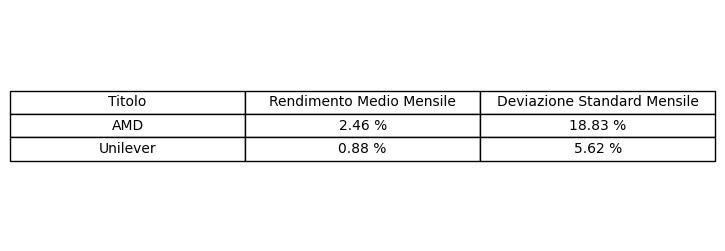

In [3]:
# Rendimento Medio e Deviazione Standard Mensile nel periodo gen 2000 - aprile 2024
data = {
    "Titolo": ["AMD", "Unilever"],
    "Rendimento Medio Mensile": [f"{round(amd_mean_monthly_return,2)} %", f"{round(unilever_mean_monthly_return,2)} %"],
    "Deviazione Standard Mensile": [f"{round(amd_std_monthly_return,2)} %", f"{round(unilever_std_monthly_return,2)} %"]
}

df = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(7, 3))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)
tabla = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.3, 1.4)
plt.savefig('amd_unilever_stats_table.png')
plt.show()


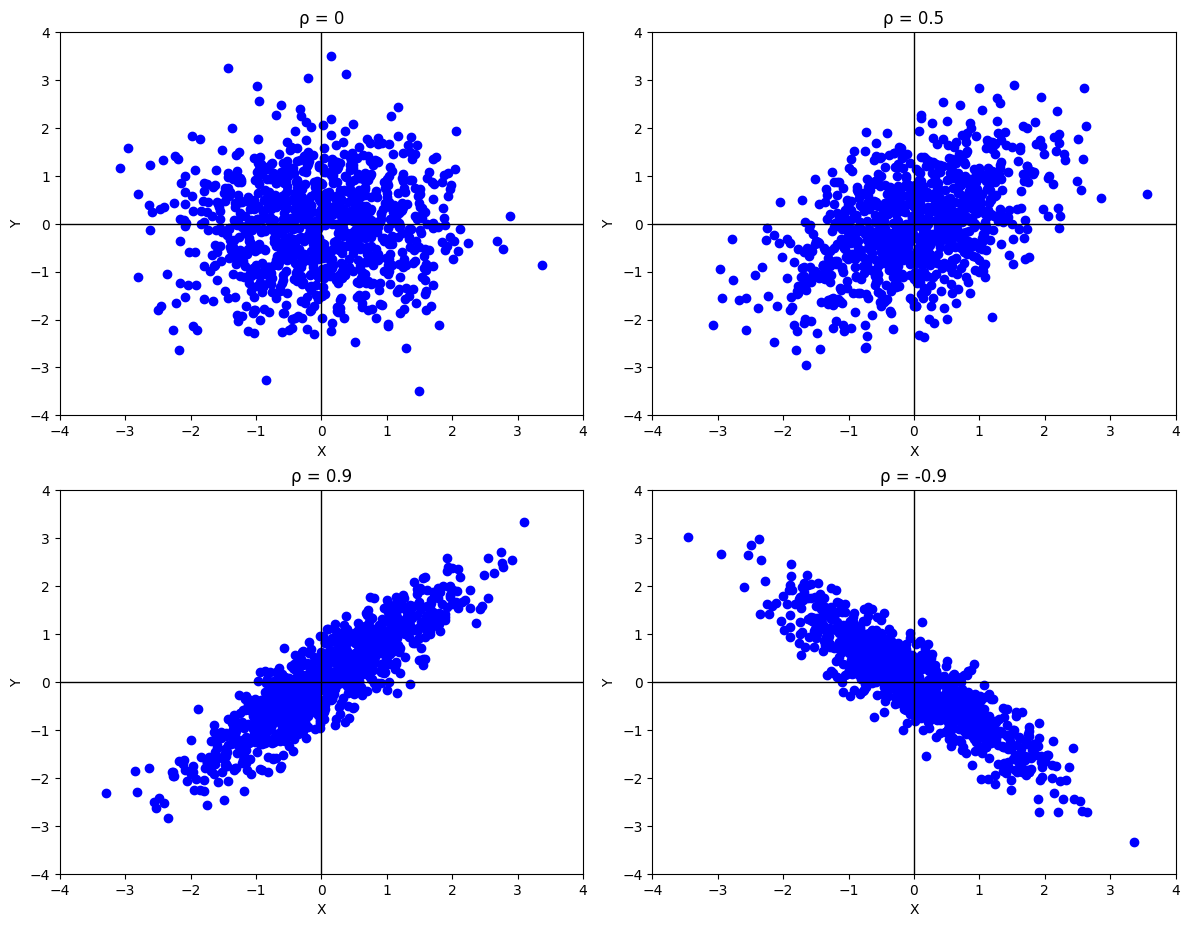

In [4]:
#Esempi di Correlazione tra 2 Variabili Random
def generate_data(rho, n=1000):
    mean = [0, 0]
    cov = [[1, rho], [rho, 1]]
    return np.random.multivariate_normal(mean, cov, n).T

# Genero i dati per le diverse correlazioni
data_0 = generate_data(0)
data_09 = generate_data(0.9)
data_05 = generate_data(0.5)
data_minus_09 = generate_data(-0.9)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# Scatter plot per rho = 0
axs[0, 0].scatter(data_0[0], data_0[1], color='blue')
axs[0, 0].set_title('ρ = 0')
axs[0, 0].axhline(y=0, color='k', linewidth=1)
axs[0, 0].axvline(x=0, color='k', linewidth=1)
# Scatter plot per rho = 0.5
axs[0, 1].scatter(data_05[0], data_05[1], color='blue')
axs[0, 1].set_title('ρ = 0.5')
axs[0, 1].axhline(y=0, color='k', linewidth=1)
axs[0, 1].axvline(x=0, color='k', linewidth=1)
# Scatter plot per rho = 0.9
axs[1, 0].scatter(data_09[0], data_09[1], color='blue')
axs[1, 0].set_title('ρ = 0.9')
axs[1, 0].axhline(y=0, color='k', linewidth=1)
axs[1, 0].axvline(x=0, color='k', linewidth=1)
# Scatter plot per rho = -0.9
axs[1, 1].scatter(data_minus_09[0], data_minus_09[1], color='blue')
axs[1, 1].set_title('ρ = -0.9')
axs[1, 1].axhline(y=0, color='k', linewidth=1)
axs[1, 1].axvline(x=0, color='k', linewidth=1)
# Imposto i limiti degli assi e i layout
for ax in axs.flat:
    ax.set_xlim([-4, 4])
    ax.set_ylim([-4, 4])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('examples_of_correlation.png')
plt.show()

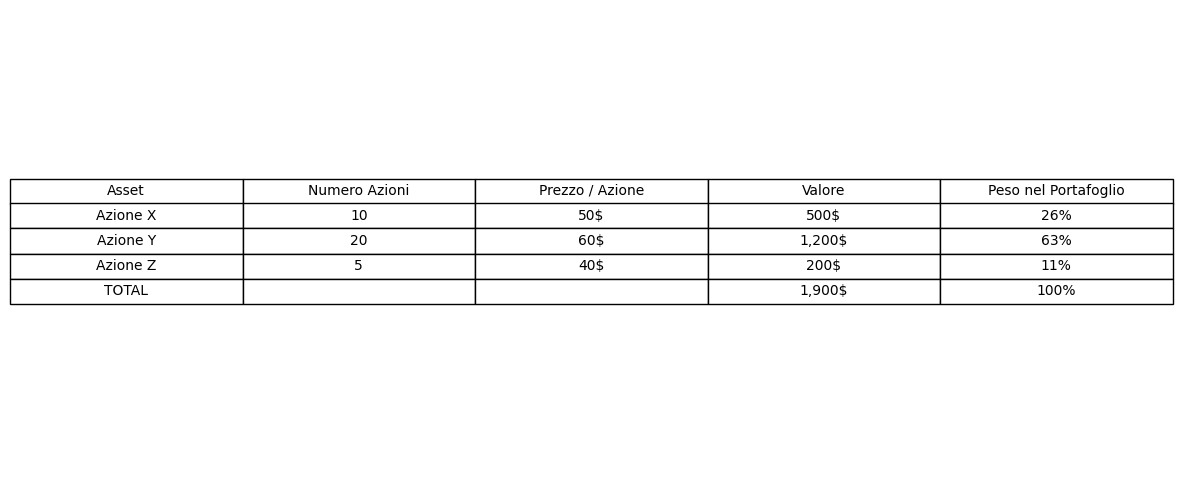

In [5]:
#Esempio di Portafoglio Finanziario
data = {
    "Asset": ["Azione X", "Azione Y", "Azione Z", "TOTAL"],
    "Numero Azioni": [10, 20, 5, ""],
    "Prezzo / Azione": ["50$", "60$", "40$", ""],
    "Valore": ["500$", "1,200$", "200$", "1,900$"],
    "Peso nel Portafoglio": ["26%", "63%", "11%", "100%"]
}

df = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(10, 6))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)
tabla = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.5, 1.5)
plt.savefig('examples_of_portfolio.png', bbox_inches='tight')
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


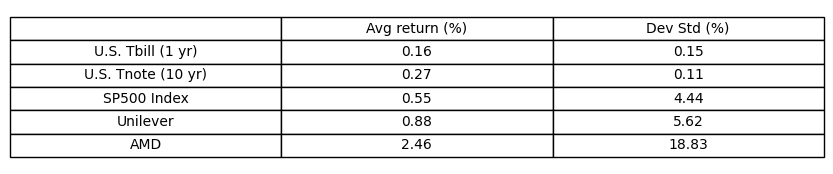

In [6]:
#Performance storica del mercato
start_datetime = datetime.datetime(2000, 1, 1)
end_datetime = datetime.datetime(2024, 4, 30)
def calculate_monthly_stats(ticker: str, start: str, end: str) -> tuple:

    if (ticker== "GS1") or (ticker=="GS10"):
        data= web.DataReader(ticker, 'fred', start, end)
        data = data.rename(columns={ticker: 'Annual_Return'})
        data.dropna(inplace=True)

        data["Monthly_Return"]= (1 + (data['Annual_Return'] / 100)) ** (1/12) -1
        mean_monthly_return = data['Monthly_Return'].mean()
        std_monthly_return= data['Monthly_Return'].std()
        return (round(mean_monthly_return*100,2), round(std_monthly_return*100,2))
    
    else:
        data = yf.download(ticker, start=start, end=end)
        monthly_data = data['Adj Close'].resample('M').last()

        monthly_return = monthly_data.pct_change() * 100
        monthly_return.dropna(inplace=True)
    
        # Calcolo il rendimento medio mensile percentuale
        mean_monthly_return = monthly_return.mean()
        # Calcolo la deviazione standard mensile 
        std_monthly_return = monthly_return.std()
    
        return (round(mean_monthly_return,2), round(std_monthly_return,2)) # Restituisco la tupla (Rendimento medio mensile, Deviazione Std)

# Calcolo le statistiche per US Tbill (1yr), US Tnote (10yr), Indice SP500, Microsoft Corporation, Advanced Micro Devices Corporation, Unilever, The Coca Cola Company
results= {}
tickers = ['GS1','GS10', '^GSPC', 'MSFT', 'AMD', 'UL', 'KO']
for ticker in tickers:
    results[ticker] = calculate_monthly_stats(ticker, start_datetime, end_datetime)

data = {
    "": ["U.S. Tbill (1 yr)", "U.S. Tnote (10 yr)", "SP500 Index", "Unilever", "AMD"],
    "Avg return (%)": [results["GS1"][0], results["GS10"][0], results["^GSPC"][0], results["UL"][0], results["AMD"][0]],
    "Dev Std (%)": [results["GS1"][1], results["GS10"][1], results["^GSPC"][1], results["UL"][1], results["AMD"][1]]
}

df = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(7, 2))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)
tabla = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.5, 1.4)
plt.savefig('market_stats.png', bbox_inches='tight')
plt.show()


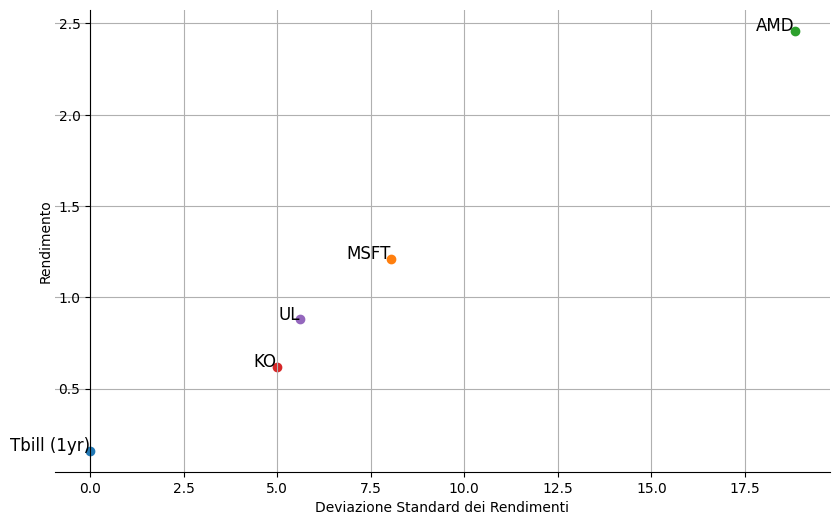

In [7]:
#Grafico del Rendimento vs DevStd di più asset
results = {
    'Tbill (1yr)': (results["GS1"][0], 0),
    'MSFT': results["MSFT"],
    'AMD': results["AMD"],
    'KO': results["KO"],
    'UL': results["UL"]
}

fig, ax = plt.subplots(figsize=(10, 6))
for ticker, (mean_return, std_dev) in results.items():
    ax.scatter(std_dev, mean_return, label=ticker)
    ax.text(std_dev, mean_return, ticker, fontsize=12, ha='right')
ax.set_xlabel('Deviazione Standard dei Rendimenti')
ax.set_ylabel('Rendimento')
ax.grid(True)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.tick_left()
plt.savefig('risk_reward_graph.png', bbox_inches='tight')
plt.show()

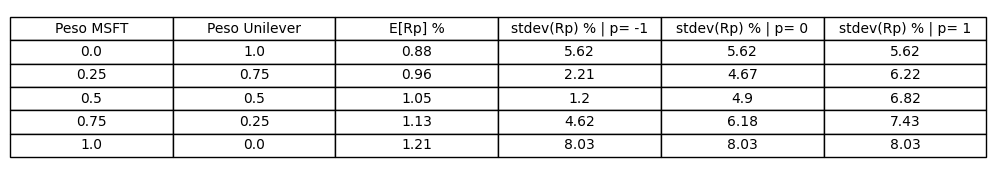

In [8]:
#Costruzione di un portafoglio ipotetico con 2 titoli, con diversi pesi e diverse correlaioni.
mean_monthly_return_A = results["MSFT"][0]/100
std_monthly_return_A = results["MSFT"][1]/100
mean_monthly_return_B = results["UL"][0]/100
std_monthly_return_B = results["UL"][1]/100

# Diverse combinazioni di pesi
weights = [(0, 1), (0.25, 0.75), (0.5, 0.5), (0.75, 0.25), (1, 0)]

# Funzione per calcolare il rendimento atteso mensile del portafoglio
def expected_monthly_return(w_A, w_B, mean_monthly_return_A, mean_monthly_return_B):
    return (w_A * mean_monthly_return_A + w_B * mean_monthly_return_B)*100


# Funzione per calcolare la deviazione standard mensile del portafoglio
def portfolio_std_dev(w_A, w_B, std_monthly_return_A, std_monthly_return_B, correlation):
    return (np.sqrt((w_A * std_monthly_return_A)**2 + (w_B * std_monthly_return_B)**2 + 2 * w_A * w_B * std_monthly_return_A * std_monthly_return_B * correlation))*100

data = {
    "Peso MSFT": [0.00, 0.25, 0.50, 0.75, 1.00],
    "Peso Unilever": [1.00, 0.75, 0.50, 0.25, 0.00],
    "E[Rp] %": [round(expected_monthly_return(0, 1, mean_monthly_return_A, mean_monthly_return_B),2), 
              round(expected_monthly_return(0.25, 0.75, mean_monthly_return_A, mean_monthly_return_B),2),
              round(expected_monthly_return(0.50, 0.50, mean_monthly_return_A, mean_monthly_return_B),2),
              round(expected_monthly_return(0.75, 0.25, mean_monthly_return_A, mean_monthly_return_B),2),
              round(expected_monthly_return(1, 0, mean_monthly_return_A, mean_monthly_return_B),2)],
    "stdev(Rp) % | p= -1": [round(portfolio_std_dev(0, 1, std_monthly_return_A, std_monthly_return_B, -1),2), 
              round(portfolio_std_dev(0.25, 0.75, std_monthly_return_A, std_monthly_return_B, -1),2),
              round(portfolio_std_dev(0.50, 0.50, std_monthly_return_A, std_monthly_return_B, -1),2),
              round(portfolio_std_dev(0.75, 0.25, std_monthly_return_A, std_monthly_return_B, -1),2),
              round(portfolio_std_dev(1, 0, std_monthly_return_A, std_monthly_return_B, -1),2)],
    "stdev(Rp) % | p= 0": [round(portfolio_std_dev(0, 1, std_monthly_return_A, std_monthly_return_B, 0),2), 
              round(portfolio_std_dev(0.25, 0.75, std_monthly_return_A, std_monthly_return_B, 0),2),
              round(portfolio_std_dev(0.50, 0.50, std_monthly_return_A, std_monthly_return_B, 0),2),
              round(portfolio_std_dev(0.75, 0.25, std_monthly_return_A, std_monthly_return_B, 0),2),
              round(portfolio_std_dev(1, 0, std_monthly_return_A, std_monthly_return_B, 0),2)],
    "stdev(Rp) % | p= 1": [round(portfolio_std_dev(0, 1, std_monthly_return_A, std_monthly_return_B, 1),2), 
              round(portfolio_std_dev(0.25, 0.75, std_monthly_return_A, std_monthly_return_B, 1),2),
              round(portfolio_std_dev(0.50, 0.50, std_monthly_return_A, std_monthly_return_B, 1),2),
              round(portfolio_std_dev(0.75, 0.25, std_monthly_return_A, std_monthly_return_B, 1),2),
              round(portfolio_std_dev(1, 0, std_monthly_return_A, std_monthly_return_B, 1),2)]
}

df = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(7, 2))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)
tabla = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.8, 1.4)
plt.savefig('portfolio_risk_return_with_different_p.png', bbox_inches='tight')
plt.show()

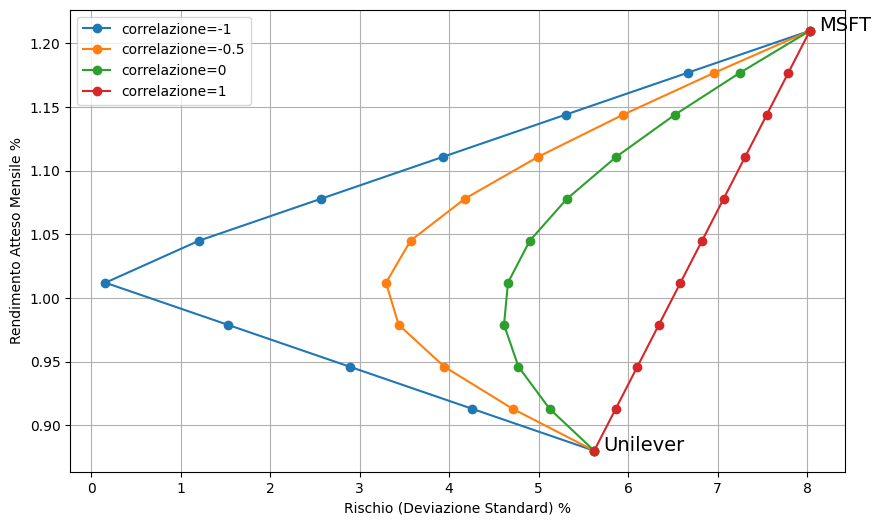

In [9]:
mean_monthly_return_A = results["MSFT"][0]/100
std_monthly_return_A = results["MSFT"][1]/100
mean_monthly_return_B = results["UL"][0]/100
std_monthly_return_B = results["UL"][1]/100

pesi= []
for x in list(range(0,11,1)):
    pesi.append(x/10)

rischio_rendimento= {-1: [], -0.5:[], 0:[], 1:[]}
for rho in [-1,-0.5,0,1]:
    for peso in pesi:
        w_A= peso
        w_B= 1-w_A
        expected_portfolio_monthly_return= expected_monthly_return(w_A, w_B, mean_monthly_return_A, mean_monthly_return_B)
        portfolio_std= portfolio_std_dev(w_A, w_B, std_monthly_return_A, std_monthly_return_B, rho)
        rischio_rendimento[rho].append((portfolio_std, expected_portfolio_monthly_return))

plt.figure(figsize=(10, 6))
plt.text(results["UL"][1]+0.1, results["UL"][0], 'Unilever', fontsize=14, ha='left')
plt.text(results["MSFT"][1]+0.1, results["MSFT"][0], 'MSFT', fontsize=14, ha='left')
for correlation, data in rischio_rendimento.items():
    x_values = [t[0] for t in data]
    y_values = [t[1] for t in data]
    plt.plot(x_values, y_values, marker='o', linestyle='-', label=f'correlazione={correlation}')
plt.xlabel('Rischio (Deviazione Standard) %')
plt.ylabel('Rendimento Atteso Mensile %')
plt.grid(True)
plt.legend()

plt.savefig('mean_variance_and_correlations.png', bbox_inches='tight')
plt.show()